In [1]:
#IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ARZOO/2021 Python for Machine Learning & Data Science Masterclass/DATA/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Linear Regression

In [4]:
#SEPARATING FEATURES AND LABELS FROM THE DATAFRAME

X=df.drop("sales",axis=1)
y=df["sales"]

In [5]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#SPLITTING THE DATA INTO TRAINING AND TESTING DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#CREATING AN INSTANCE OF LINEAR REGRESSION MODEL

model=LinearRegression()
model

LinearRegression()

In [11]:
#FITTING THE DATA IN THE MODEL

model.fit(X_train,y_train)

LinearRegression()

In [12]:
#VALUES OF BETA COEFFICIENTS 

model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [13]:
#PREDICTING VALUES OFF OF TEST DATA

pred_values=model.predict(X_test)
pred_values

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
#CALCULATING MEAN ABSOLUTE ERROR

MAE=mean_absolute_error(y_test,pred_values)
MAE

1.2137457736144805

In [16]:
#CALCULATE MEAN SQUARED ERROR

MSE=mean_squared_error(y_test,pred_values)
MSE

2.298716697886378

In [17]:
#CALCULATE ROOT MEAN SQUARED ERROR

RMSE=np.sqrt(MSE)
RMSE

1.5161519375993877

In [18]:
#RETRAINING MODEL ON FULL DATA

final_model = LinearRegression()
final_model

LinearRegression()

In [19]:
final_model.fit(X,y)

LinearRegression()

In [20]:
pred_y = final_model.predict(X)

In [21]:
#CALCULATING RESIDUALS

residuals = y - pred_y 

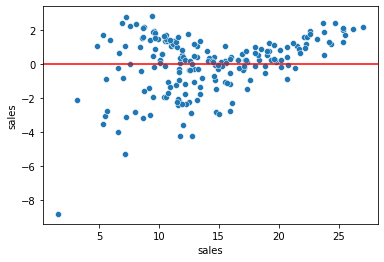

In [22]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(color='r')

In [23]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [24]:
ser=pd.Series(final_model.coef_,index=["TV","radio","newspaper"],name="Coefficients")
ser

TV           0.045765
radio        0.188530
newspaper   -0.001037
Name: Coefficients, dtype: float64

In [25]:
#PREDICITNG ON NEW DATA

input=[[149,22,12]]
final_model.predict(input)

C:\Users\ARZOO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [27]:
#TRANSFORMING FEATURES INTO POLYNOMIAL FEATURES

poly_features=polynomial_converter.fit_transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [28]:
poly_features.shape

(200, 9)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#SPLITTING THE DATA

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
test_predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
#CALCULATING ERRORS

MAE=mean_absolute_error(y_test,test_predictions)
MSE=mean_squared_error(y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [36]:
MAE

0.48967980448038056

In [37]:
MSE

0.4417505510403708

In [38]:
RMSE

0.664643175726924

In [51]:
#CHECKING WHICH DEGREE OF POLYNOMIAL IS OPTIMAL BY RUNNING A FOR LOOP

train_RMSE_errors=[]
test_RMSE_errors=[]

for d in range(1,6):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_RMSE=np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE=np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_RMSE_errors.append(train_RMSE)
    test_RMSE_errors.append(test_RMSE)

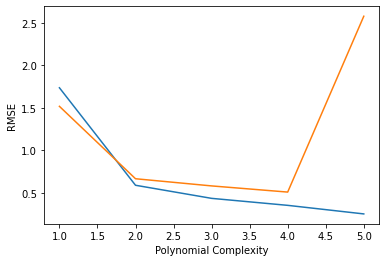

In [52]:
#DEGREE 3 IS OPTIMAL AS RMSE OF TRAIN AND TEST DATA IS MINIMISED WITHOUT OVERFITTING

plt.plot(range(1,6),train_RMSE_errors[:5],label="TRAIN")
plt.plot(range(1,6),test_RMSE_errors[:5],label="TEST")
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.show()

In [48]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [49]:
#CREATING A FINAL MODEL

final_model=LinearRegression()

In [50]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [52]:
#PREDICTING NEW DATA

campaign = [[149,22,12]]
poly_campaign=final_poly_converter.transform(campaign)
final_model.predict(poly_campaign)

C:\Users\ARZOO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.64501014])